## Import Libraries

In [1]:
# !pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

In [3]:
## Load Patient Survival Dataset

In [4]:
dataset = pd.read_csv(r"C:\Users\Snehal Thakur\OneDrive\Documents\Trainings\Datasets\PatientSurvivalDetection\dataset.csv")
dataset.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


## EDA

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [6]:
dataset.shape

(91713, 186)

In [7]:
dataset.describe(include='all')

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90318,91688,90379.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90051,90051
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,10
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caucasian,M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70684,49469,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29999,38816
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,NaN,NaN,169.641588,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,NaN
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,NaN,NaN,10.795378,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,NaN
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,NaN,NaN,137.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,NaN,NaN,162.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,NaN,NaN,170.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,NaN,NaN,177.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [8]:
dataset.describe(include=['object'])

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
count,90318,91688,70304,91601,91713,91713,90051,90051
unique,6,2,15,5,3,8,11,10
top,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
freq,70684,49469,36962,54060,86183,50586,29999,38816


In [9]:
# Check duplicate rows
dataset.duplicated().sum()

0

In [10]:
# Check Null records
dataset.isna().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [11]:
# Impute null records with mean()
dataset.fillna(dataset.mean(),inplace=True)

C:\Users\SNEHAL~1\AppData\Local\Temp/ipykernel_23476/3425756792.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(),inplace=True)


In [12]:
dataset.isna().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                               0
                               ... 
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [13]:
dataset['apache_3j_bodysystem'].value_counts()

Cardiovascular          29999
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64

In [14]:
dataset['apache_3j_bodysystem'].count()

90051

In [15]:
# Imputing null values with unknown in categorical columns
dataset['apache_3j_bodysystem'].fillna('unknown',inplace=True)
dataset['apache_2_bodysystem'].fillna('unknown',inplace=True)
dataset['ethnicity'].fillna('unknown',inplace=True)
dataset['hospital_admit_source'].fillna('unknown',inplace=True)
dataset['icu_admit_source'].fillna('unknown',inplace=True)
dataset['gender'].fillna('unknown',inplace=True)

In [16]:
dataset.isna().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 186, dtype: int64

In [17]:
col_list = dataset.select_dtypes(include=['object']).columns.to_list()
dataset[col_list].isna().sum()

ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
apache_3j_bodysystem     0
apache_2_bodysystem      0
dtype: int64

In [18]:
# Dropping unused columns
dataset.drop(['encounter_id','hospital_id','patient_id','icu_id','icu_stay_type'], inplace=True, axis=1)

In [19]:
dataset.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,CTICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,Med-Surg ICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,29.185818,0,Caucasian,M,188.0,unknown,Accident & Emergency,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [20]:
# Seperating fratures and target columns
X = dataset.drop(['hospital_death'], axis=1)
y= dataset['hospital_death']
print(X)
print(y)

             age        bmi  elective_surgery  ethnicity gender  height  \
0      68.000000  22.730000                 0  Caucasian      M   180.3   
1      77.000000  27.420000                 0  Caucasian      F   160.0   
2      25.000000  31.950000                 0  Caucasian      F   172.7   
3      81.000000  22.640000                 1  Caucasian      F   165.1   
4      19.000000  29.185818                 0  Caucasian      M   188.0   
...          ...        ...               ...        ...    ...     ...   
91708  75.000000  23.060250                 0  Caucasian      M   177.8   
91709  56.000000  47.179671                 0  Caucasian      F   183.0   
91710  48.000000  27.236914                 0  Caucasian      M   170.2   
91711  62.309516  23.297481                 0  Caucasian      F   154.9   
91712  82.000000  22.031250                 1  Caucasian      F   160.0   

      hospital_admit_source           icu_admit_source      icu_type  \
0                     Floor

In [21]:
# !pip install -U scikit-learn

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Creating train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=46, shuffle=True)

In [24]:
# prepare input data - OrdinalEncoding
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    #oe.fit(X_train)
    X_train_enc = oe.fit_transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [25]:
# prepare target - LabelEncoding
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [26]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [27]:
X_test['ethnicity'].value_counts()

Caucasian           17677
African American     2426
Other/Unknown        1069
Hispanic              927
unknown               342
Asian                 267
Native American       221
Name: ethnicity, dtype: int64

In [28]:
# define min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_train = scaler.fit_transform(X_train_enc)
print(scaled_train)

scaled_test = scaler.transform(X_test_enc)
print(pd.DataFrame(scaled_test))

[[0.78378378 0.42334026 0.         ... 0.         0.63636364 0.4       ]
 [0.94594595 0.37623054 0.         ... 0.         0.         0.        ]
 [0.77027027 0.35119392 0.         ... 0.         0.63636364 0.4       ]
 ...
 [0.66216216 0.68848997 1.         ... 0.         0.90909091 0.7       ]
 [0.63513514 0.31808427 0.         ... 0.         0.09090909 0.1       ]
 [0.95945946 0.36550056 0.         ... 0.         0.72727273 0.6       ]]
            0         1    2         3    4         5         6    7    \
0      0.837838  0.570017  1.0  0.333333  0.0  0.488000  0.533333  0.4   
1      0.729730 -0.000034  1.0  0.333333  0.5  0.821333  0.533333  0.4   
2      0.108108  0.274960  0.0  0.333333  0.0  0.429333  0.200000  0.0   
3      0.851351  0.602650  0.0  0.333333  0.5  0.826667  0.133333  0.0   
4      0.932432  0.264264  0.0  0.333333  0.0  0.472000  0.200000  0.0   
...         ...       ...  ...       ...  ...       ...       ...  ...   
22924  0.662162  0.282250  0.0  0.3333

In [29]:
scaled_train.shape[1]

180

In [30]:
# Create Sequential NN model
model = keras.Sequential()
model.add(Dense(1024, input_dim=scaled_train.shape[1],activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              185344    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [31]:
# patience - how many epochs to wait before stop training
# if there is no further improvement 
# monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)
callback = EarlyStopping(monitor='loss', patience=3)
# Complete the model fit operation

#Also we set up big epochs size, just to test that easly stopping is working
history = model.fit(scaled_train, y_train, batch_size=300, epochs=30, validation_data=(scaled_test, y_test), callbacks=[callback], verbose=1)

Epoch 1/30
230/230 [==============================] - 8s 15ms/step - loss: 0.0000e+00 - accuracy: 0.9125 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 2/30
230/230 [==============================] - 3s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9132 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 3/30
230/230 [==============================] - 3s 12ms/step - loss: 0.0000e+00 - accuracy: 0.9132 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 4/30
230/230 [==============================] - 3s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9132 - val_loss: 0.0000e+00 - val_accuracy: 0.9152


In [32]:
# history = model.fit(scaled_train, y_train,
#           validation_split=0.2,
#           batch_size=300,
#           epochs=10,
#           verbose=2)

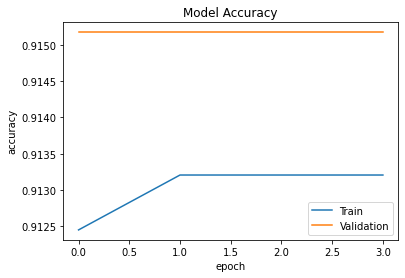

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

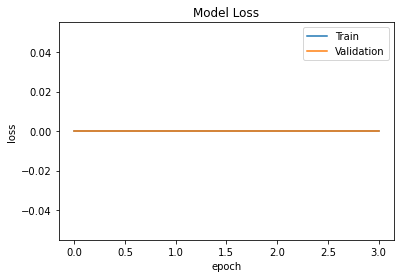

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [35]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_enc, y_test_enc)
print("test loss, test acc:", results)

Evaluate on test data
717/717 [==============================] - 4s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9152
test loss, test acc: [0.0, 0.9151729345321655]
